### Step 1: Creating the "Academic Performance" Dataset
For demonstration purposes, let's create a synthetic dataset that captures student performance variables.


In [1]:
import pandas as pd
import numpy as np

# Set a seed for reproducibility
np.random.seed(42)

# Create a synthetic dataset
data = {
    'Student_ID': range(1, 101),
    'Gender': np.random.choice(['Male', 'Female'], 100),
    'Age': np.random.randint(18, 25, 100),
    'Study_Hours': np.abs(np.random.normal(10, 5, 100)),  # Some hours might be high due to outliers
    'GPA': np.random.uniform(2.0, 4.0, 100),
    'Extracurricular_Activities': np.random.choice(['Yes', 'No'], 100)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Introduce some missing values for demonstration
df.loc[5, 'GPA'] = np.nan
df.loc[10, 'Study_Hours'] = np.nan


### Step 2: Scan for Missing Values and Handle Them
First, let’s identify any missing values and handle them using imputation techniques.

In [2]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Handle missing values by filling them
# Fill missing 'GPA' values with the mean GPA
df['GPA'].fillna(df['GPA'].mean(), inplace=True)

# Fill missing 'Study_Hours' values with the median Study_Hours
df['Study_Hours'].fillna(df['Study_Hours'].median(), inplace=True)

# Verify there are no more missing values
print("Missing values after imputation:\n", df.isnull().sum())


Missing values per column:
 Student_ID                    0
Gender                        0
Age                           0
Study_Hours                   1
GPA                           1
Extracurricular_Activities    0
dtype: int64
Missing values after imputation:
 Student_ID                    0
Gender                        0
Age                           0
Study_Hours                   0
GPA                           0
Extracurricular_Activities    0
dtype: int64


C:\Users\0x4C3DD\AppData\Local\Temp\ipykernel_14152\1875381398.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GPA'].fillna(df['GPA'].mean(), inplace=True)
C:\Users\0x4C3DD\AppData\Local\Temp\ipykernel_14152\1875381398.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

### Step 3: Scan for Outliers in Numeric Variables
To detect outliers, we can use the Interquartile Range (IQR) method for continuous variables like `Study_Hours` and `GPA`.

In [3]:
# Define a function to identify outliers based on IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers in Study_Hours
study_hours_outliers = detect_outliers(df, 'Study_Hours')
print("Outliers in Study_Hours:\n", study_hours_outliers)

# Handle outliers in Study_Hours by capping them at the upper limit
Q1 = df['Study_Hours'].quantile(0.25)
Q3 = df['Study_Hours'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
df['Study_Hours'] = np.where(df['Study_Hours'] > upper_bound, upper_bound, df['Study_Hours'])

# Check for outliers after capping
study_hours_outliers_post = detect_outliers(df, 'Study_Hours')
print("Outliers in Study_Hours after handling:\n", study_hours_outliers_post)


Outliers in Study_Hours:
     Student_ID  Gender  Age  Study_Hours       GPA Extracurricular_Activities
95          96  Female   24    25.305476  3.869228                         No
Outliers in Study_Hours after handling:
 Empty DataFrame
Columns: [Student_ID, Gender, Age, Study_Hours, GPA, Extracurricular_Activities]
Index: []



### Step 4: Apply Data Transformation
Now, let’s transform the `Study_Hours` variable to reduce skewness and improve distribution. A common technique is applying a logarithmic transformation if the data is highly skewed.


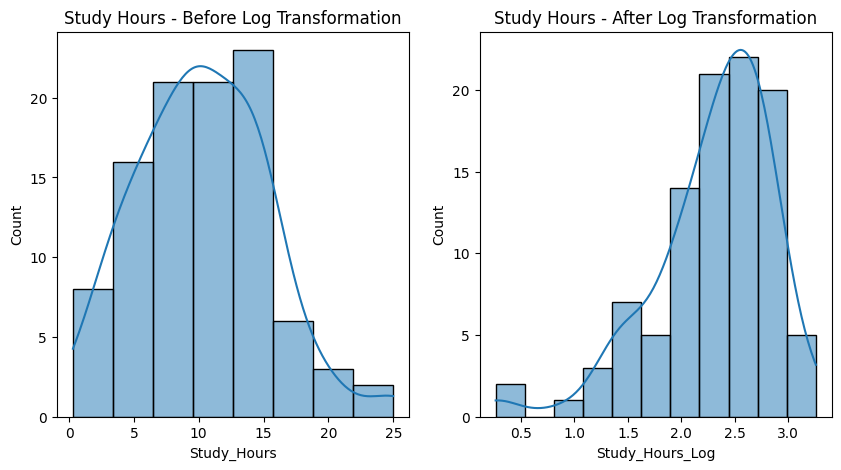

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Study_Hours before transformation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Study_Hours'], kde=True)
plt.title('Study Hours - Before Log Transformation')

# Apply logarithmic transformation to Study_Hours
df['Study_Hours_Log'] = np.log1p(df['Study_Hours'])  # log1p is used to handle zero values

# Plot Study_Hours after transformation
plt.subplot(1, 2, 2)
sns.histplot(df['Study_Hours_Log'], kde=True)
plt.title('Study Hours - After Log Transformation')
plt.show()


**Reason for Transformation**:  
The original `Study_Hours` variable might have been positively skewed, meaning most students have lower study hours, with a few outliers who study much more than the average. A logarithmic transformation reduces this skewness, normalizing the data and improving its distribution, which can be beneficial for some models and visualizations.

### Summary
- **Missing Values**: We handled missing values by filling `GPA` with the mean and `Study_Hours` with the median.
- **Outliers**: We capped outliers in `Study_Hours` at the upper limit based on the IQR.
- **Transformation**: We applied a logarithmic transformation on `Study_Hours` to reduce skewness, achieving a more normalized distribution.
